In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [3]:
x_train = train.drop(columns=['label'])
y_train = train['label']

x_train = x_train / 255.0
test = test / 255.0

x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

2024-07-27 13:45:29.693330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 13:45:29.693498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 13:45:29.858437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs = 15, validation_data = (x_test, y_test))

Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8830 - loss: 0.3911 - val_accuracy: 0.9719 - val_loss: 0.0885
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9786 - val_loss: 0.0681
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9880 - loss: 0.0398 - val_accuracy: 0.9799 - val_loss: 0.0591
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9827 - val_loss: 0.0518
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9829 - val_loss: 0.0539
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9966 - loss: 0.0117 - val_accuracy: 0.9837 - val_loss: 0.0590
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9804 - val_loss: 0.0729
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9977 -

In [9]:
y_pred = model.predict(test)


875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [10]:
sub = sample_sub.copy(deep=False)

In [11]:
labels = np.argmax(y_pred, axis = 1)
sub['Label'] = labels

In [12]:
sub['Label'].unique()

array([2, 0, 9, 3, 7, 5, 4, 1, 6, 8])

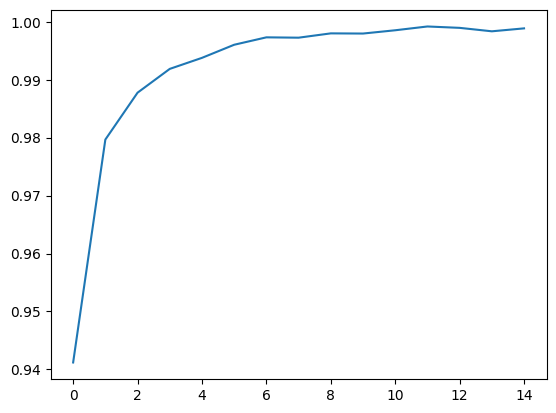

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [14]:
sub.to_csv("submission.csv", index=False)